https://pytorch.org/docs/stable/nn.html

In [1]:
!pip3 install Pillow==4.0.0
!pip3 install torch==0.4.0
!pip3 install torchvision==0.2.1
# !pip install http://download.pytorch.org/whl/cu80/torch-0.3.0.post4-cp36-cp36m-linux_x86_64.whl 

    100% |████████████████████████████████| 484.0MB 27kB/s 
tcmalloc: large alloc 1073750016 bytes == 0x5b8fc000 @  0x7fef224791c4 0x46d6a4 0x5fcbcc 0x4c494d 0x54f3c4 0x553aaf 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54efc1 0x54f24d 0x551ee0 0x54efc1 0x54f24d 0x551ee0 0x54e4c8 0x54f4f6 0x553aaf 0x54e4c8
    100% |████████████████████████████████| 61kB 3.9MB/s 
    100% |████████████████████████████████| 2.0MB 10.2MB/s 
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully uninstalled Pillow-4.0.0


In [0]:
import torch 
import torchvision
import torch.nn as nn
import numpy as np
import torchvision.transforms as transforms

%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np

# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# torch.nn

## Parameters

## Containers

すべてのニューラルネットワークモジュールの基本クラス。 あなたのモデルもこのクラスをサブクラス化する必要があります。 

モジュールには他のモジュールも含めることができ、それらをツリー構造でネストすることができます。サブモジュールを通常の属性として割り当てることができます。


In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))

このように割り当てられたサブモジュールは登録され、.cuda（）などを呼び出すとパラメータも変換されます。

#add_module(name, module)

現在のモジュールに子モジュールを追加します。 モジュールは、指定された名前を使用して属性としてアクセスできます。

In [0]:
#TODO

#apply(fn)

すべてのサブモジュール（.children（）によって返される）とselfにfnを再帰的に適用します。典型的な使用には、モデルのパラメータの初期化が含まれます

In [5]:
def init_weights(m):
    print(m)
    if type(m) == nn.Linear:
        m.weight.data.fill_(1.0)
        print(m.weight)

net = nn.Sequential(nn.Linear(2, 2), nn.Linear(2, 2))
net.apply(init_weights)

Linear(in_features=2, out_features=2, bias=True)
Parameter containing:
tensor([[ 1.,  1.],
        [ 1.,  1.]])
Linear(in_features=2, out_features=2, bias=True)
Parameter containing:
tensor([[ 1.,  1.],
        [ 1.,  1.]])
Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)


Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): Linear(in_features=2, out_features=2, bias=True)
)

#children()

直接の子モジュール上のイテレータを返します。

In [7]:
#TODO

# class Model(nn.Module):
#     def __init__(self):
#         super(Model, self).__init__()
#         self.conv1 = nn.Conv2d(1, 20, 5)
#         self.conv2 = nn.Conv2d(20, 20, 5)

#     def forward(self, x):
#         x = F.relu(self.conv1(x))
#         return F.relu(self.conv2(x))
# net = Model()
# net.children()

<generator object Module.children at 0x7fe223f0a0f8>

# モデルをcudaで使用する：cuda(device=None)

すべてのモデルパラメータとバッファをGPUに移動します。 これは関連するパラメータを作成し、異なるオブジェクトをバッファします。したがって、オプティマイザを構築する前に、最適化されている間GPU上にモジュールが存在する場合は呼び出す必要があります。


In [9]:
class Model(nn.Module):
    def __init__(self):
        super(Model, self).__init__()
        self.conv1 = nn.Conv2d(1, 20, 5)
        self.conv2 = nn.Conv2d(20, 20, 5)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        return F.relu(self.conv2(x))
net = Model()
net.cuda() #add

Model(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(20, 20, kernel_size=(5, 5), stride=(1, 1))
)

# double()

すべての浮動小数点パラメータとバッファをdoubleデータ型にキャストします。

# dump_patches = False

これにより、load_state_dict（）のBCサポートが向上します。 state_dict（）では、バージョン番号は返された状態のdictの属性_metadataに保存され、したがってピクルされます。 _metadataは、キーがstate dictの命名規則に従った辞書です。ロード時にこの情報を使用する方法については、_load_from_state_dictを参照してください。 新しいパラメータ/バッファがモジュールに追加/削除された場合、この番号はバンプされ、モジュールの_load_from_state_dictメソッドはバージョン番号を比較し、状態dictが変更前のものであれば適切な変更を行うことができます。


# モジュールを評価モードに設定：eval()

モジュールを評価モードに設定します。 これは特定のモジュールに対してのみ有効です。トレーニング/評価モードでの行動の詳細については、特定のモジュールのドキュメントを参照してください。ドロップアウト、BatchNormなど



# extra_repr()

モジュールの余分な表現を設定する カスタマイズされた追加情報を印刷するには、独自のモジュールでこのメソッドを再実装する必要があります。単一行と複数行の両方の文字列を使用できます。

# float()

# forward(*input)


呼び出しごとに実行される計算を定義します。 すべてのサブクラスによってオーバーライドされる必要があります。


# half()

すべての浮動小数点パラメータとバッファを半分のデータ型にキャストします。

# load_state_dict(state_dict, strict=True)

state_dictのパラメータとバッファをこのモジュールとその子孫にコピーします。 strictがTrueの場合、state_dictのキーは、このモジュールのstate_dict（）関数によって返されたキーと正確に一致する必要があります。

#「略」

# class torch.nn.Sequential(*args)





In [0]:
from collections import OrderedDict

# Example of using Sequential
model = nn.Sequential(
          nn.Conv2d(1,20,5),
          nn.ReLU(),
          nn.Conv2d(20,64,5),
          nn.ReLU()
        )

# Example of using Sequential with OrderedDict
model = nn.Sequential(OrderedDict([
          ('conv1', nn.Conv2d(1,20,5)),
          ('relu1', nn.ReLU()),
          ('conv2', nn.Conv2d(20,64,5)),
          ('relu2', nn.ReLU())
        ]))


#Convolution layers

# 1次元畳み込み

```
class torch.nn.Conv1d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
```

in_channels：入力画像のチャンネル数。    
out_channels：畳み込みによって生成されるチャンネル数    
kernel_size：カーネルサイズ。    
stride：ストライド。デフォルトは1。    
padding：入力の両側にゼロパディングを追加。デフォルトは0。    
dilation：カーネル要素間の間隔。デフォルトは1。    
groups：入力チャネルから出力チャネルへの接続数。デフォルトは1。    
bias：Trueの場合バイアスを出力に追加する。デフォルトは1。    


In [0]:
m = nn.Conv1d(16, 33, 3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)

# 2次元畳み込み


```
class torch.nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
```

in_channels：入力画像のチャンネル数。    
out_channels：畳み込みによって生成されるチャンネル数    
kernel_size：カーネルサイズ。    
stride：ストライド。デフォルトは1。    
padding：入力の両側にゼロパディングを追加。デフォルトは0。    
dilation：カーネル要素間の間隔。デフォルトは1。    
groups：入力チャネルから出力チャネルへの接続数。デフォルトは1。    
bias：Trueの場合バイアスを出力に追加する。デフォルトは1。    






https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

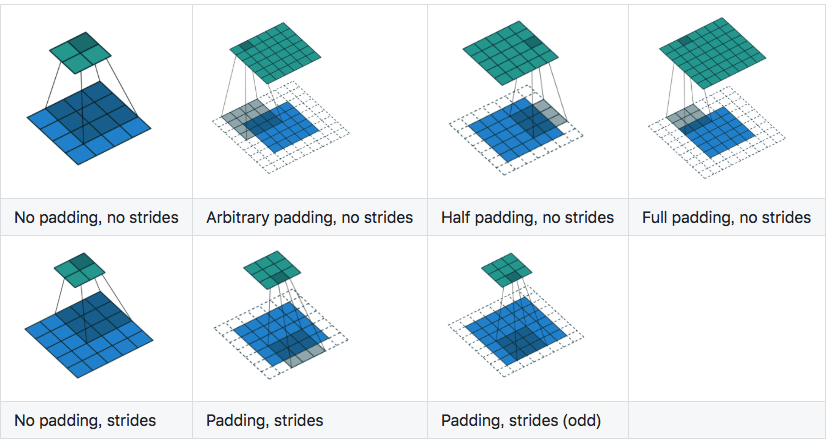

In [0]:
# 正方形のカーネル、縦横ストライドが同じ
m = nn.Conv2d(16, 33, kernel_size=3, stride=2)
# 非正方形のカーネルと不均等なストライドとパディング
m = nn.Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2))
# 非正方形のカーネルと不均等なストライドとパディングとdilation
m = nn.Conv2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2), dilation=(3, 1))
input = torch.randn(20, 16, 50, 100)
output = m(input)

<hr>

groups=1：すべての入力はすべての出力にコンボリューションされます。    
groups=2：入力チャンネルの半分を見て出力チャンネルの半分を生成し後で両方を連結する、2つのconvレイヤーを並べることと同等になります。     
groups= in_channels：各入力チャンネルはそれ自身のフィルタのセットと畳み込まれる。    


【ここで使ってる】

- Depthwise / Separable

わかりやすい図

https://www.slideshare.net/JinwonLee9/shufflenet-pr054

https://discuss.pytorch.org/t/depthwise-and-separable-convolutions-in-pytorch/7315

https://github.com/nerox8664/pytorch2keras/blob/master/tests/depthwise_conv2d.py#L8


PyTorchのgroups遅いと言ってる記事。

https://qiita.com/yu4u/items/cf3f81e32fe613747f76

tfでも遅いと言ってる。フィルターを増やした場合は早いのでは説。


https://github.com/tensorflow/tensorflow/issues/12940

tf：DepthwiseConv2dNative    
pytorch：Conv2dImpl、spatialDepthwiseConvolutionUpdateOutput


# 3次元畳み込み


```
class torch.nn.Conv3d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True)
```

in_channels：入力画像のチャンネル数。    
out_channels：畳み込みによって生成されるチャンネル数    
kernel_size：カーネルサイズ。    
stride：ストライド。デフォルトは1。    
padding：入力の両側にゼロパディングを追加。デフォルトは0。    
dilation：カーネル要素間の間隔。デフォルトは1。    
groups：入力チャネルから出力チャネルへの接続数。デフォルトは1。    
bias：Trueの場合バイアスを出力に追加する。デフォルトは1。    



In [0]:
# With square kernels and equal stride
m = nn.Conv3d(16, 33, 3, stride=2)
# non-square kernels and unequal stride and with padding
m = nn.Conv3d(16, 33, (3, 5, 2), stride=(2, 1, 1), padding=(4, 2, 0))
input = torch.randn(20, 16, 10, 50, 100)
output = m(input)

# 1次元転置畳み込み

逆畳み込みとも呼ばれる。特徴マップをアップサンプリングする。


複数の入力面で構成される入力画像に1Dの転置畳み込み演算子を適用します。 このモジュールは、入力に対するConv1dの勾配と見ることができます。これは分数ストライド畳み込みまたはデコンボリューションとも呼ばれます（実際のデコンボリューション演算ではありません）。


```
class torch.nn.ConvTranspose1d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1)
```


# 2次元転置畳み込み

fractionally-strided convolution or a deconvolution（実際はデコンボリューション演算ではない。）
アップサンプリング（nn.Upsample）と違い重みとバイアスがある。


ConvTとUpsample+Convの違い

https://qiita.com/phyblas/items/3b999debd487aaabfc12



```
Input: (N,Cin,Hin,Win)
```



```
class torch.nn.ConvTranspose2d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1)
```

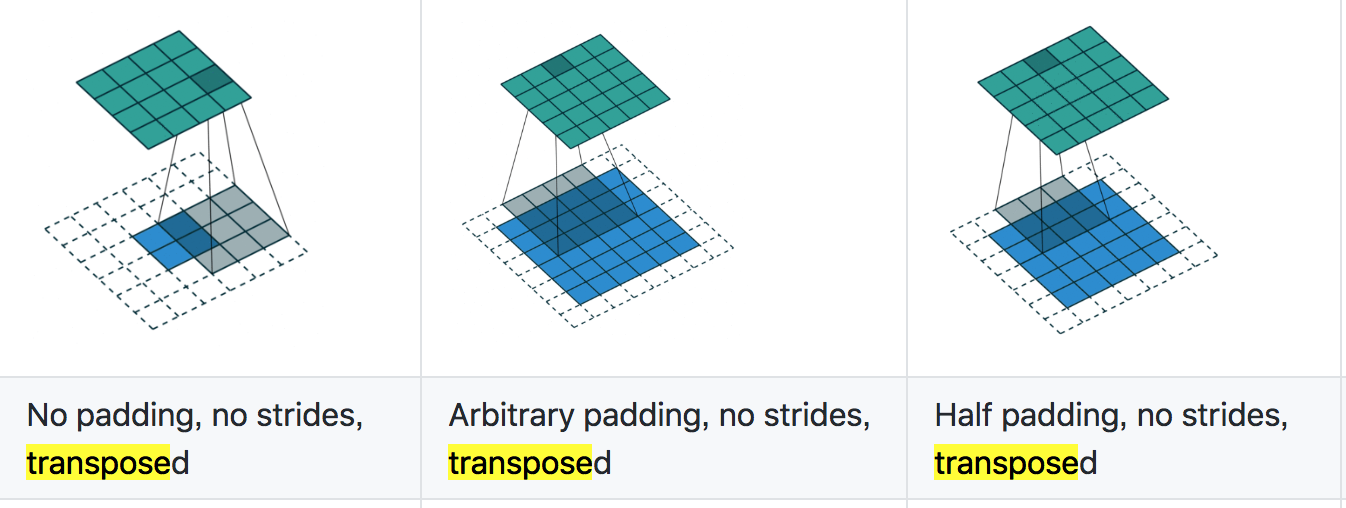

https://github.com/vdumoulin/conv_arithmetic/blob/master/README.md

均一な値と不均一なデータを設定できる。

In [14]:
input = torch.randn(20, 16, 5, 6)
# 正方形のカーネル、縦横ストライドが同じ
m = nn.ConvTranspose2d(16, 33, kernel_size=3, stride=2)
print(m(input).shape)
# 非正方形のカーネルと不均等なストライドとパディング
m = nn.ConvTranspose2d(16, 33, kernel_size=(3, 5), stride=(2, 1), padding=(4, 2))
print(m(input).shape)

torch.Size([20, 33, 11, 13])
torch.Size([20, 33, 3, 6])


In [15]:
input = torch.randn(20, 16, 50, 100)
output = m(input)
print(output.shape)

torch.Size([20, 33, 93, 100])


In [18]:
# 正確な出力サイズを引数として指定することもできます
input = torch.randn(1, 16, 12, 12)
downsample = nn.Conv2d(16, 16, 3, stride=2, padding=1)
upsample = nn.ConvTranspose2d(16, 16, 3, stride=2, padding=1)
h = downsample(input)
print("downsample："+str(h.size()))
#アップサンプルの出力サイズに入力のサイズを入れた例
output = upsample(h, output_size=input.size())
print("upsample："+str(output.size()))

downsample：torch.Size([1, 16, 6, 6])
upsample：torch.Size([1, 16, 12, 12])


# 3次元転置畳み込み

```
class torch.nn.ConvTranspose3d(in_channels, out_channels, kernel_size, stride=1, padding=0, output_padding=0, groups=1, bias=True, dilation=1)
```

# 1次元マックスプーリング


```
class torch.nn.MaxPool1d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
```

kernel_size：カーネルサイズ    
stride：ストライド。デフォルトはkernel_size。    
padding：両端にゼロを追加。    
dilation：ストライドを制御。    
return_indices：Trueの場合、出力とともに最大インデックスが返されます。後でアンプールするときに便利    
ceil_mode：Trueの場合、floorの代わりにceilを使用して出力を計算します。floorは切り捨て。ceilは切り捨て。    


torch.nn.functional.avg_pool1dにも機能がある。

In [27]:
# pool of size=3, stride=2
m = nn.MaxPool1d(3, stride=2)
input = torch.randn(20, 16, 50)
output = m(input)

print(input.shape)
print(output.shape)

torch.Size([20, 16, 50])
torch.Size([20, 16, 24])


1次元の1〜7のテンソルがマックスプーリングされて端の17だけが消える。

In [28]:
# pool with window of size=3, stride=1
m = nn.MaxPool1d(3, stride=1)
m(torch.tensor([[[1.,2,3,4,5,6,7]]]))

tensor([[[ 3.,  4.,  5.,  6.,  7.]]])

1次元の1〜7のテンソルがマックスプーリングされて246だけが残る。

In [29]:
# pool with window of size=3, stride=2
m = nn.MaxPool1d(3, stride=2)
m(torch.tensor([[[1.,2,3,4,5,6,7]]]))

tensor([[[ 3.,  5.,  7.]]])

# 2次元マックスプーリング

```
class torch.nn.MaxPool2d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
```

kernel_size：カーネルサイズ    
stride：ストライド。デフォルトはkernel_size。    
padding：両端にゼロを追加。    
dilation：ストライドを制御。    
return_indices：Trueの場合、出力とともに最大インデックスが返されます。後でアンプールするときに便利    
ceil_mode：Trueの場合、floorの代わりにceilを使用して出力を計算します。floorは切り捨て。ceilは切り捨て。

In [25]:
# サイズの正方形のカーネル= 3、ストライド= 2
m = nn.MaxPool2d(3, stride=2)
# 非正方形のカーネル
m = nn.MaxPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
output = m(input)
print(input.shape)

torch.Size([20, 16, 50, 32])


# 3次元マックスプーリング

```
class torch.nn.MaxPool3d(kernel_size, stride=None, padding=0, dilation=1, return_indices=False, ceil_mode=False)
```

kernel_size：カーネルサイズ    
stride：ストライド。デフォルトはkernel_size。    
padding：両端にゼロを追加。    
dilation：ストライドを制御。    
return_indices：Trueの場合、出力とともに最大インデックスが返されます。後でアンプールするときに便利    
ceil_mode：Trueの場合、floorの代わりにceilを使用して出力を計算します。floorは切り捨て。ceilは切り捨て。

In [26]:
# サイズの正方形のカーネル= 3、ストライド= 2
m = nn.MaxPool3d(3, stride=2)
# 非正方形のカーネル
m = nn.MaxPool3d((3, 2, 2), stride=(2, 1, 2))
input = torch.randn(20, 16, 50,44, 31)
output = m(input)
print(input.shape)

torch.Size([20, 16, 50, 44, 31])


# 1次元アベレージプーリング

```
class torch.nn.AvgPool1d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True)
```

kernel_size：カーネルサイズ    
stride：ストライド。デフォルトはkernel_size。    
padding：両端にゼロを追加。    
ceil_mode：Trueの場合、floorの代わりにceilを使用して出力を計算します。floorは切り捨て。ceilは切り捨て。    
count_include_pad：Trueの場合、平均化計算にゼロパディングが含まれる。    


In [10]:
# pool with window of size=3, stride=2
m = nn.AvgPool1d(3, stride=2)
m(torch.tensor([[[1.,2,3,4,5,6,7]]]))

tensor([[[ 2.,  4.,  6.]]])

# 2次元アベレージプーリング

```
class torch.nn.AvgPool2d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True)
```

kernel_size：カーネルサイズ    
stride：ストライド。デフォルトはkernel_size。    
padding：両端にゼロを追加。    
ceil_mode：Trueの場合、floorの代わりにceilを使用して出力を計算します。floorは切り捨て。ceilは切り捨て。    
count_include_pad：Trueの場合、平均化計算にゼロパディングが含まれる。    


In [0]:
# pool of square window of size=3, stride=2
m = nn.AvgPool2d(3, stride=2)
# pool of non-square window
m = nn.AvgPool2d((3, 2), stride=(2, 1))
input = torch.randn(20, 16, 50, 32)
output = m(input)

# 3次元アベレージプーリング

```
class torch.nn.AvgPool3d(kernel_size, stride=None, padding=0, ceil_mode=False, count_include_pad=True)
```

kernel_size：カーネルサイズ    
stride：ストライド。デフォルトはkernel_size。    
padding：両端にゼロを追加。    
ceil_mode：Trueの場合、floorの代わりにceilを使用して出力を計算します。floorは切り捨て。ceilは切り捨て。    
count_include_pad：Trueの場合、平均化計算にゼロパディングが含まれる。    


In [0]:
# pool of square window of size=3, stride=2
m = nn.AvgPool3d(3, stride=2)
# pool of non-square window
m = nn.AvgPool3d((3, 2, 2), stride=(2, 1, 2))
input = torch.randn(20, 16, 50,44, 31)
output = m(input)

# 1次元アダプティブマックスプーリング

```
class torch.nn.AdaptiveMaxPool1d(output_size, return_indices=False)
```

1Dアダプティブ最大プーリングを適用。 出力サイズは任意の入力サイズに対してHです。出力フィーチャの数は入力プレーンの数に等しい

output_size：目標出力サイズH    
return_indices：Trueの場合、出力とともにインデックスを返す。 nn.MaxUnpool1dに渡すと便利です。デフォルト：False    



In [31]:
# 目標出力サイズ5
m = nn.AdaptiveMaxPool1d(5)
input = torch.randn(1, 64, 8)
output = m(input)

print(output.shape)

torch.Size([1, 64, 5])


# 2次元アダプティブマックスプーリング

2Dアダプティブ最大プーリングを適用。

```
class torch.nn.AdaptiveMaxPool2d(output_size, return_indices=False)
```


output_size：形式H x Wのイメージのターゲット出力サイズ。正方形のイメージH x Hのタプル（H、W）または単一のHとすることができます。HおよびWは、intまたはNone入力と同じになります。

return_indices：Trueの場合、出力とともにインデックスを返します。 nn.MaxUnpool2dに渡すと便利です。デフォルト：False


In [33]:
# 目標出力サイズは5x7
m = nn.AdaptiveMaxPool2d((5,7))
input = torch.randn(1, 64, 8, 9)
output = m(input)

print(output.size())

# 目標出力サイズは7×7（平方）
m = nn.AdaptiveMaxPool2d(7)
input = torch.randn(1, 64, 10, 9)
output = m(input)

print(output.size())

# target output size of 10x7
# m = nn.AdaptiveMaxPool2d((None, 7))
# input = torch.randn(1, 64, 10, 9)
# output = m(input)


torch.Size([1, 64, 5, 7])
torch.Size([1, 64, 7, 7])


# 3次元アダプティブマックスプーリング

3Dアダプティブ最大プーリングを適用。
出力は、任意の入力サイズに対して、サイズD×H×Wである。出力フィーチャの数は入力プレーンの数に等しい。


```
class torch.nn.AdaptiveMaxPool3d(output_size, return_indices=False)
```

output_size：形式D x H x Wの画像のターゲット出力サイズ。キューブD x D xのタプル（D、H、W）または単一Dになります。D、HおよびWは、int 、またはNoneは入力のサイズと同じサイズになります。

return_indices：Trueの場合、出力とともにインデックスを返します。 nn.MaxUnpool3dに渡すと便利です。デフォルト：False

In [0]:
# target output size of 5x7x9
m = nn.AdaptiveMaxPool3d((5,7,9))
input = torch.randn(1, 64, 8, 9, 10)
output = m(input)
# target output size of 7x7x7 (cube)
m = nn.AdaptiveMaxPool3d(7)
input = torch.randn(1, 64, 10, 9, 8)
output = m(input)
# target output size of 7x9x8
# m = nn.AdaptiveMaxPool3d((7, None, None))
# input = torch.randn(1, 64, 10, 9, 8)
# output = m(input)

# 1次元アダプティブアベレージプーリング

```
class torch.nn.AdaptiveAvgPool1d(output_size)
```

In [0]:
# target output size of 5
m = nn.AdaptiveAvgPool1d(5)
input = torch.randn(1, 64, 8)
output = m(input)

# 2次元アダプティブアベレージプーリング

```
class torch.nn.AdaptiveAvgPool2d(output_size)
```

In [0]:
# target output size of 5x7
m = nn.AdaptiveAvgPool2d((5,7))
input = torch.randn(1, 64, 8, 9)
output = m(input)
# target output size of 7x7 (square)
m = nn.AdaptiveAvgPool2d(7)
input = torch.randn(1, 64, 10, 9)
output = m(input)
# target output size of 10x7
# m = nn.AdaptiveMaxPool2d((None, 7))
# input = torch.randn(1, 64, 10, 9)
# output = m(input)

# 3次元アダプティブアベレージプーリング

```
class torch.nn.AdaptiveAvgPool3d(output_size)
```

In [0]:
# target output size of 5x7x9
m = nn.AdaptiveAvgPool3d((5,7,9))
input = torch.randn(1, 64, 8, 9, 10)
output = m(input)
# target output size of 7x7x7 (cube)
m = nn.AdaptiveAvgPool3d(7)
input = torch.randn(1, 64, 10, 9, 8)
output = m(input)
# target output size of 7x9x8
# m = nn.AdaptiveMaxPool3d((7, None, None))
# input = torch.randn(1, 64, 10, 9, 8)
# output = m(input)

# 入力境界の反映を使用して入力1次元テンソルをパディングする

入力境界の値から逆方向の値を使用してパディングする。


```
class torch.nn.ReflectionPad1d(padding)
```

padding：パディングのサイズがintの場合、すべての境界で同じパディングが使用されます。 2タプルの場合は、（paddingLeft、paddingRight）



In [34]:
m = nn.ReflectionPad1d(2)
input = torch.arange(8).reshape(1, 2, 4)
input

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.]]])

In [35]:
m(input)

tensor([[[ 2.,  1.,  0.,  1.,  2.,  3.,  2.,  1.],
         [ 6.,  5.,  4.,  5.,  6.,  7.,  6.,  5.]]])

In [36]:
# using different paddings
m = nn.ReflectionPad1d((3, 1))
m(input)

tensor([[[ 3.,  2.,  1.,  0.,  1.,  2.,  3.,  2.],
         [ 7.,  6.,  5.,  4.,  5.,  6.,  7.,  6.]]])

In [31]:
m = nn.ReflectionPad1d(2)
input = torch.arange(10).reshape(1, 2, 5)
input

tensor([[[ 0.,  1.,  2.,  3.,  4.],
         [ 5.,  6.,  7.,  8.,  9.]]])

# 入力境界の反映を使用して入力2次元テンソルをパディングする


```
class torch.nn.ReflectionPad2d(padding)
```

padding：パディングのサイズがintの場合、すべての境界で同じパディングが使用されます。 4タプルの場合は、（paddingLeft、paddingRight、paddingTop、paddingBottom）を使用します。

【ここで使ってる】

- Style Transfer

CycleGANのResNetBlockでパディングをReflectionPad2dかReplicationPad2dが選べるようになってる実装があった。    

https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix/blob/master/models/networks.py#L141

Perceptual Losses for Real-Time Style Transfer
and Super-Resolution    
のDownsampling and Upsampling.
https://cs.stanford.edu/people/jcjohns/papers/eccv16/JohnsonECCV16.pdf

- Siamese Net
padについて論文に書いてる感じがしないが、、

https://www.cs.cmu.edu/~rsalakhu/papers/oneshot1.pdf

https://github.com/SeokjuLee/SiameseNet-TS/blob/master/model.py#L8


- DeblurGAN

ボカシ軽減の画像生成。
ResNetBlock。

https://github.com/KupynOrest/DeblurGAN/blob/master/models/networks.py#L110

- CartoonGAN

アニメ風変換。誤差関数にContent lossとあり、VGG特徴量同士の絶対値を引く。


https://github.com/Yijunmaverick/CartoonGAN-Test-Pytorch-Torch/blob/master/network/Transformer.py#L9


http://openaccess.thecvf.com/content_cvpr_2018/CameraReady/2205.pdf



In [37]:
m = nn.ReflectionPad2d(2)
input = torch.arange(9).reshape(1, 1, 3, 3)
input

tensor([[[[ 0.,  1.,  2.],
          [ 3.,  4.,  5.],
          [ 6.,  7.,  8.]]]])

In [38]:
m(input)

tensor([[[[ 8.,  7.,  6.,  7.,  8.,  7.,  6.],
          [ 5.,  4.,  3.,  4.,  5.,  4.,  3.],
          [ 2.,  1.,  0.,  1.,  2.,  1.,  0.],
          [ 5.,  4.,  3.,  4.,  5.,  4.,  3.],
          [ 8.,  7.,  6.,  7.,  8.,  7.,  6.],
          [ 5.,  4.,  3.,  4.,  5.,  4.,  3.],
          [ 2.,  1.,  0.,  1.,  2.,  1.,  0.]]]])

In [39]:
# using different paddings
m = nn.ReflectionPad2d((1, 1, 2, 0))
m(input)

tensor([[[[ 7.,  6.,  7.,  8.,  7.],
          [ 4.,  3.,  4.,  5.,  4.],
          [ 1.,  0.,  1.,  2.,  1.],
          [ 4.,  3.,  4.,  5.,  4.],
          [ 7.,  6.,  7.,  8.,  7.]]]])

# 入力境界の複製を使用して入力1次元テンソルをパディング

```
class torch.nn.ReplicationPad1d(padding)
```

In [40]:
m = nn.ReplicationPad1d(2)
input = torch.arange(8).reshape(1, 2, 4)
input

tensor([[[ 0.,  1.,  2.,  3.],
         [ 4.,  5.,  6.,  7.]]])

In [41]:
m(input)

tensor([[[ 0.,  0.,  0.,  1.,  2.,  3.,  3.,  3.],
         [ 4.,  4.,  4.,  5.,  6.,  7.,  7.,  7.]]])

In [42]:
# using different paddings
m = nn.ReplicationPad1d((3, 1))
m(input)

tensor([[[ 0.,  0.,  0.,  0.,  1.,  2.,  3.,  3.],
         [ 4.,  4.,  4.,  4.,  5.,  6.,  7.,  7.]]])

# 入力境界の複製を使用して入力2次元テンソルをパディング


```
class torch.nn.ReplicationPad2d(padding)
```

In [34]:
m = nn.ReplicationPad2d(2)
input = torch.arange(9).reshape(1, 1, 3, 3)
input

tensor([[[[ 0.,  1.,  2.],
          [ 3.,  4.,  5.],
          [ 6.,  7.,  8.]]]])

In [35]:
m(input)

tensor([[[[ 0.,  0.,  0.,  1.,  2.,  2.,  2.],
          [ 0.,  0.,  0.,  1.,  2.,  2.,  2.],
          [ 0.,  0.,  0.,  1.,  2.,  2.,  2.],
          [ 3.,  3.,  3.,  4.,  5.,  5.,  5.],
          [ 6.,  6.,  6.,  7.,  8.,  8.,  8.],
          [ 6.,  6.,  6.,  7.,  8.,  8.,  8.],
          [ 6.,  6.,  6.,  7.,  8.,  8.,  8.]]]])

In [37]:
# using different paddings
m = nn.ReplicationPad2d((1, 1, 2, 0))
m(input)

tensor([[[[ 0.,  0.,  1.,  2.,  2.],
          [ 0.,  0.,  1.,  2.,  2.],
          [ 0.,  0.,  1.,  2.,  2.],
          [ 3.,  3.,  4.,  5.,  5.],
          [ 6.,  6.,  7.,  8.,  8.]]]])

# 入力されたテンソル境界をゼロで埋める

```
class torch.nn.ZeroPad2d(padding)
```

padding：パディングのサイズがintの場合、すべての境界で同じパディングが使用されます。 4タプルの場合は、（paddingLeft、paddingRight、paddingTop、paddingBottom）を使用します。



【ここで使ってる】

- unet、DiscoGAN

ZeroPad2dを使ってるunetとそうでないunetがある。

使ってる。

https://github.com/HelioStrike/Pytorch-DiscoGAN/blob/master/models.py#L59

使ってない。

https://github.com/timctho/unet-pytorch/blob/master/Unet.py#L96


この畳み込みは非常に簡潔に書けてる気がする。

https://github.com/godisboy/Image2image/blob/master/model/networks.py#L68




In [46]:
#2のパディングが全ての境界に入る。
m = nn.ZeroPad2d(2)
input = torch.randn(1, 1, 3, 3)
input

tensor([[[[ 0.3689,  0.8153,  0.0348],
          [-1.8819,  1.1171,  0.2105],
          [ 0.8903, -1.3087,  1.4937]]]])

In [47]:
m(input)

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.3689,  0.8153,  0.0348,  0.0000,  0.0000],
          [ 0.0000,  0.0000, -1.8819,  1.1171,  0.2105,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.8903, -1.3087,  1.4937,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000,  0.0000]]]])

In [48]:
#異なるパディングを境界に適応する。
m = nn.ZeroPad2d((1, 1, 2, 0))
m(input)

tensor([[[[ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.0000,  0.0000,  0.0000,  0.0000],
          [ 0.0000,  0.3689,  0.8153,  0.0348,  0.0000],
          [ 0.0000, -1.8819,  1.1171,  0.2105,  0.0000],
          [ 0.0000,  0.8903, -1.3087,  1.4937,  0.0000]]]])